In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#replacing blanks with 0 as turn is 0 and no total charges are recorded

In [21]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
df.duplicated().sum()

np.int64(0)

In [19]:
df["customerID"].duplicated().sum()

np.int64(0)

In [29]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
        
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#Converted 0 and 1 value of senioe citizen to yes/no to make it easier to understand.

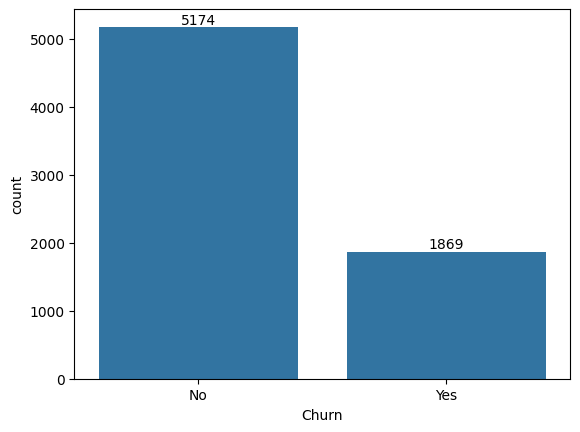

In [47]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.show()

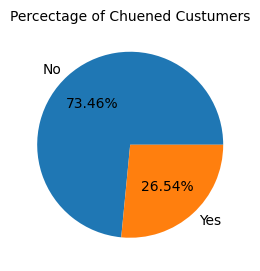

In [63]:
plt.figure(figsize =(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct = "%1.2f%%")
plt.title("Percectage of Chuened Custumers",fontsize=10)
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have churned out.

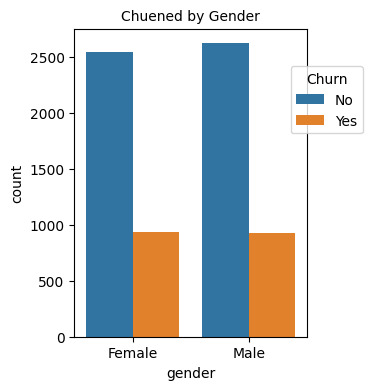

In [143]:
plt.figure(figsize =(3,4))
ax=sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Chuened by Gender",fontsize=10)
plt.legend(title="Churn",bbox_to_anchor =(0.9,0.9))
plt.show()

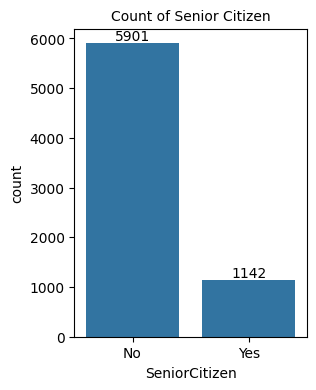

In [125]:
plt.figure(figsize =(3,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
plt.title("Count of Senior Citizen",fontsize=10)
ax.bar_label(ax.containers[0])
plt.show()

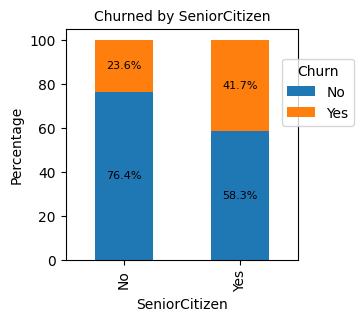

In [151]:
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100
ax = ct.plot(kind="bar", stacked=True, figsize=(3,3))
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=8)
plt.title("Churned by SeniorCitizen", fontsize=10)
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn",bbox_to_anchor =(0.9,0.9))
plt.show()

#Comparative a greater percentage of people in senior citizen catagory have churned.

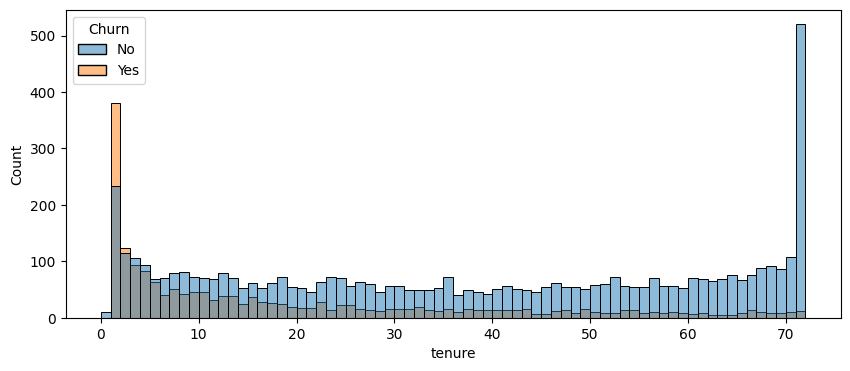

In [172]:
plt.figure(figsize =(10,4))
sns.histplot(x = "tenure",data = df,bins=72,hue='Churn')
plt.show()

#People who have used our services for a long time have stayed and people who have used our services one or two months have churned.

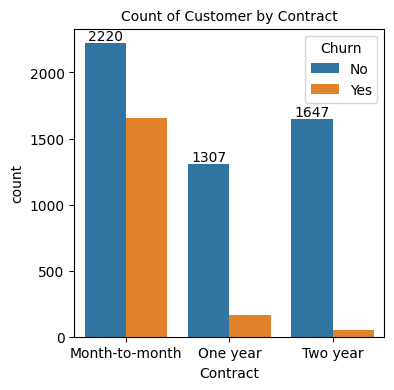

In [183]:
plt.figure(figsize =(4,4))
ax=sns.countplot(x="Contract",data=df ,hue="Churn")
plt.title("Count of Customer by Contract",fontsize=10)
ax.bar_label(ax.containers[0])
plt.show()


#people who have month to month contract are likely to churn then from those who have 1 or 2 year of contracts.

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

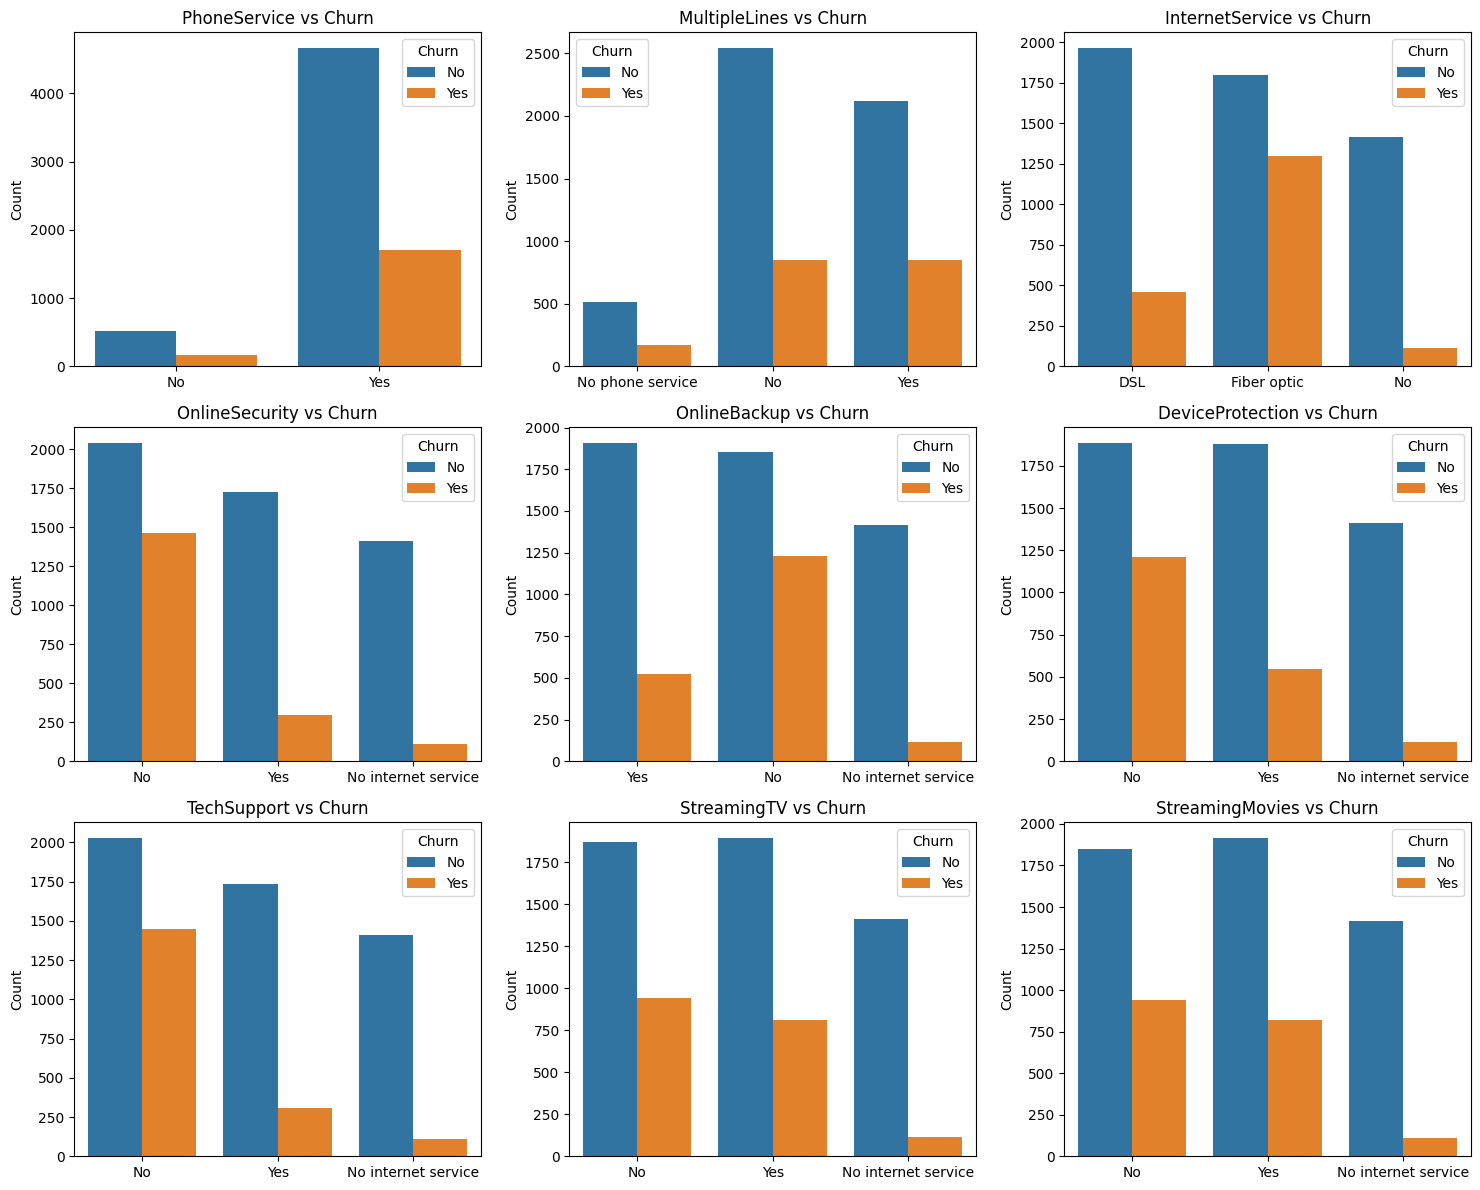

In [21]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df,hue="Churn", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn", fontsize=12)
    axes[i].set_xlabel("") 
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()


#The majority of customers who do not churn are those with services such as Phone Service, Internet Service, and Online Security enabled. In contrast,churn rates are significantly higher among customers who do not use or lack services like Online Backup, Tech Support, and Streaming TV.

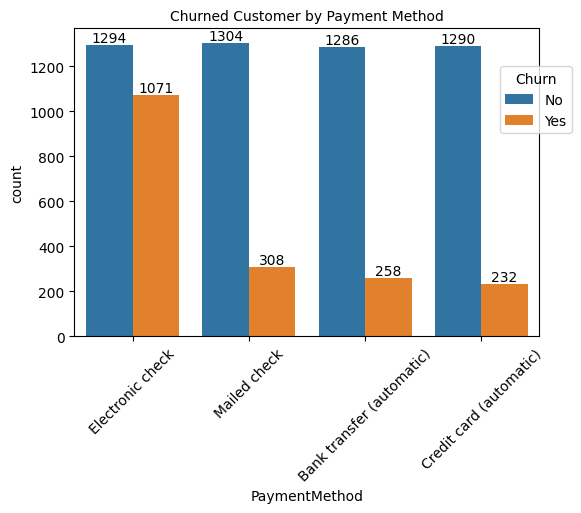

In [44]:
plt.figure(figsize =(6,4))
ax=sns.countplot(x="PaymentMethod",data=df ,hue="Churn")
plt.title("Churned Customer by Payment Method",fontsize=10)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.legend(title="Churn",bbox_to_anchor =(0.9,0.9))
plt.show()


#customer is likely to churn when he is using to electronic method.